In [3]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.__version__

'1.4.2'

In [5]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [6]:
import sklearn

In [7]:
sklearn.__version__

'1.0.2'

In [8]:
len(df.columns)

19

In [9]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds()/ 60

In [10]:
df.duration.mean()

15.612950619258486

In [11]:
df.duration.std()

34.851053592192876

In [12]:
len(df[(df.duration >=1) & (df.duration <=60)]) / len(df) *100

97.78326020432945

In [13]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

In [14]:
categorical = ['PULocationID', 'DOLocationID']

In [15]:
df[categorical] = df[categorical].astype(str)


In [16]:
train_dicts = df[categorical].to_dict(orient='records')


In [17]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [18]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (2898906, 518)


In [19]:
target = 'duration'
y_train = df[target].values

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train,y_pred,squared=False)}')

Train RMSE: 7.946173359562653


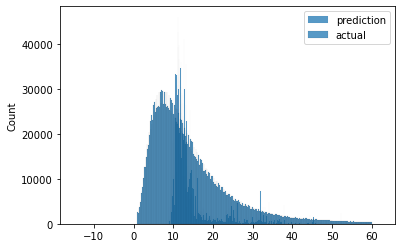

In [28]:
sns.histplot(y_pred,label='prediction')
sns.histplot(y_train,label='actual')

plt.legend();

In [22]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [23]:
df_val = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [24]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [25]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

In [26]:
y_pred = lr.predict(X_val)

In [27]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')

Val RMSE: 7.816056727010463
